# Ler, manipular e visualizar dados de  saildrones (veleiros robóticos)

Para maximizar seu aprendizado, ao trabalhar no notebook abaixo, adicione seus comentários em cada célula de código ou em células markdown.

### Passo 1: Relembrando algumas coisas básicas sobre arrays

In [26]:
import numpy as np  

In [36]:
lista_de_numeros = [1,2,3,4]
array_de_numeros = np.array([1,2,3,4])

In [37]:
type(array_de_numeros)

numpy.ndarray

In [38]:
2*array_de_numeros

array([2, 4, 6, 8])

In [44]:
# A operação acima é muito diferente em listas:
2*lista_de_numeros

[1, 2, 3, 4, 1, 2, 3, 4]

In [46]:
# Elevar um array ao cubo implica elevar cada elemento ao cubo.
cubo_de_array_de_numeros = array_de_numeros**3
cubo_de_array_de_numeros

array([ 1,  8, 27, 64])

In [49]:
# Arrays também podem ser combinados"
outro_array = np.array([10,15,18,20])
outro_array + array_de_numeros

array([11, 17, 21, 24])

In [50]:
outro_array * array_de_numeros

array([10, 30, 54, 80])

In [51]:
# As operações acima funcionaram porque os array tem o mesmo tamanho
array_of_numbers.size == another_array.size

True

In [52]:
# O módulo numpy contém um monte de funções básicas para lidas com arrays, e.g.:

# cria um array com valor de 0 a 2 pi, com incrementos de 0.1.
x = np.arange(0,2*np.pi,.1) # 

# calcula o coseno e o seno do array
cosx = np.cos(x)
sinx = np.sin(x)

In [53]:
# Podemos plotar arrays utilizando a biblioteca de plotagem do python, matplotlib:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

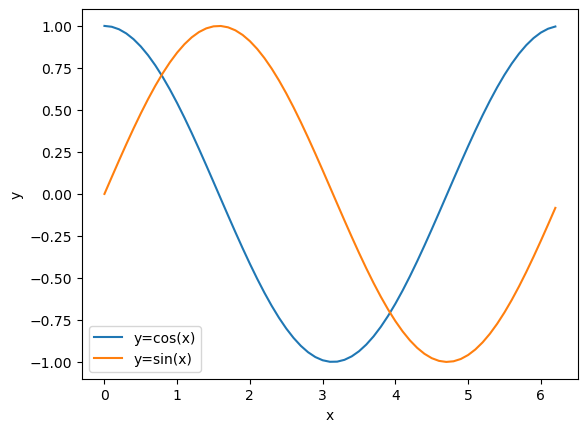

In [54]:
# Plotagem simples
plt.figure()
plt.plot(x,cosx,label='y=cos(x)')
plt.plot(x,sinx,label='y=sin(x)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [56]:
# Acesse https://matplotlib.org/ para a documentação e galeria de exemplos do matplotlib

### Passo 2: Carregando os dados do saildrone de um arquivo de texto simples
O arquivo de dados está hospedado em um repositório online: https://raw.githubusercontent.com/f-lab-USP/computational_bootcamp/main/resources/data/WestCoastSaildroneData.txt

2.1: **Baixe o arquivo de dados usando o wget**. Dica: você pode executar o comando bash `wget` em uma célula de código usando o prefixo !.

2.2 **Abra o arquivo de dados e estude o seu conteúdo**.

2.3: **Carregue os dados no Python usando a função `np.loadtxt`** do numpy, atribuindo os dados a uma variável chamada data. Essa função irá ler o arquivo de texto com os dados e convertê-los em um array numpy. O resultado deve ser um array 2D. Note que `nan` significa NotANumber, representando uma lacuna nos dados, seja porque esses eram dados ruins que não passaram pelo processo de controle de qualidade, ou porque os dados não foram coletados naquele momento específico.

Dica: para acessar a docstring, que descreve o uso de uma função, use o ponto de interrogação `?`, por exemplo, `np.loadtxt?` e. Para acessar o código-fonte de uma função, use dois pontos de interrogação `??`, por exemplo, `np.loadtxt??`.






In [66]:
!wget https://raw.githubusercontent.com/f-lab-USP/computational_bootcamp/main/resources/data/WestCoastSaildroneData.txt

--2023-08-21 09:42:55--  https://raw.githubusercontent.com/f-lab-USP/computational_bootcamp/main/resources/data/WestCoastSaildroneData.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11871729 (11M) [text/plain]
Saving to: ‘WestCoastSaildroneData.txt’

WestCoastSaildroneD 100%[===================>]  11.32M  32.8MB/s    in 0.3s    

2023-08-21 09:42:55 (32.8 MB/s) - ‘WestCoastSaildroneData.txt’ saved [11871729/11871729]



In [67]:
dados = np.loadtxt('WestCoastSaildroneData.txt')

In [68]:
dados.shape

(96868, 8)

### Passo 3: Colocando os dados em um dicionário
Os dados que você possui são uma matriz numérica 2D, onde cada coluna representa uma variável (veja o cabeçalho no arquivo de dados). Para acessar uma única variável, você pode fatiar a matriz 2D. Por exemplo, `dados[:,0]` retorna uma matriz 1D com o ano em que os dados foram coletados. Da mesma forma, `dados[:,4]` retorna uma matriz 1D com a temperatura.

Crie um dicionário chamado `dic_dados` contendo suas matrizes de dados 1D identificadas por nomes de chave significativos: ano, diaj, longitude, latitude, temperatura, salinidade, oxigenio, clorofila. A ideia é acessar os dados usando essas chaves, por exemplo, data_dict['temperatura'] retornará uma matriz 1D com a temperatura. Note que yearday em inglês é o número de dias corridos a partir de primeiros de janeiro. Em português, muitas vezes, yearday é traduzido como dia juliano (referente a primeiro de janeiro daquele ano).


In [70]:
# this is correct, but it is hard to head
dic_dados = dict(ano=dados[:,0],diaj=dados[:,1],longitude=dados[:,2],latitude=dados[:,3],temperatura=dados[:,4],salinidade=dados[:,5],oxigenio=dados[:,6],clorofila=dados[:,7],)

In [73]:
# line breaking improves readability 
dic_dados = dict(ano=dados[:,0],
                 diaj=dados[:,1],
                 longitude=dados[:,2],
                 latitude=dados[:,3],
                 temperatura=dados[:,4],
                 salinidade=dados[:,5],
                 oxigenio=dados[:,6],
                 clorofila=dados[:,7]
)

In [74]:
dic_dados.keys()

dict_keys(['ano', 'diaj', 'longitude', 'latitude', 'temperatura', 'salinidade', 'oxigenio', 'clorofila'])

Passo 4: Plotando os dados

Agora você está pronto para plotar os dados em data_dict usando o matplotlib:

4.1 **Plote um gráfico de dispersão (scatter plot) de salinidade em relação à temperatura**. Você pode usar `plt.plot` (com um marcador, por exemplo, '.' ou 'o') ou usar plt.scatter. Adicione rótulos aos eixos, incluindo unidades.

4.2 **Plote um gráfico de dispersão (scatter plot) de oxigênio em relação a clorofila**.

4.3 **Plote a temperatura em função da longitude e latitude com plt.scatter**. Talvez você queira plotar a linha da costa para ajudar a se localizar geograficamente. Um arquivo simples da linha da costa está disponível em: https://www.cbrocha.com/shared/data/WestCoastShoreLine.txt. Não se esqueça de adicionar rótulos aos seus gráficos identificando os eixos x e y. Você também deve adicionar uma barra de cores com `plt.colorbar`. Dica: para colorir os pontos dos seus gráficos de dispersão, você precisa passar a temperatura e o argumento c no plt.scatter. Verifique o auxílio para obter detalhes: `plt.scatter?`

4.4 **Plote mais uma variável de sua escolha em função da longitude e latitude**.

4.5: **Salve seus gráficos como figuras .png utilizando plt.savefig('nome_do_arquivo.png')**. Use nomes de arquivos significativos.

